<a href="https://colab.research.google.com/github/edieski/data-wrangling-and-exploration-open-food-facts/blob/main/nettoyage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Application santé publique
* Pour mon premier projet j'ai decidé de me baser sur une idée d'application qui prédirait les catégories nutritionelles car en regardant les données je me suis rendu compte que des pays comme les USA n'ont pas d'étiquettes sur la qualités nutritionelles des aliments, mon application permettrait sur les données fournises de prédire la categorie de n'importe quel aliment de n'importe quel pays afin de prendre une décision plus infromée.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as st 
import matplotlib.pyplot as plt
import openpyxl


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_excel(r'/content/gdrive/My Drive/openclassrooms/try.xlsx')


## Nettoyer nos données

Afin de pouvoir construire une application qui marche nous devons avoir des données pour les features que nous choisirons c'est pour cela que nous allons tenter d'eliminer les catégories avec trop de valeur manquantes.

##Nombre de valeurs manquantes et type de la colonne

Nous allons afficher le nombre de valeurs manquantes pour avoir une idée des colonnes qui sont trop vides pour etre utilisées. Ensuite, nous allons construire un programme pour éliminer les colonnes avec plus de 50 % de valeurs manquantes.



In [ ]:
for i in df.columns:
    print(i, sum(df[i].isna()), df[i].dtype)
  

code 79 float64
url 23 object
creator 2 object
created_t 23 float64
created_datetime 24 datetime64[ns]
last_modified_t 23 float64
last_modified_datetime 23 datetime64[ns]
product_name 17762 object
generic_name 267977 object
quantity 215953 object
packaging 241812 object
packaging_tags 241811 object
brands 28412 object
brands_tags 28420 object
categories 236362 object
categories_tags 236383 object
categories_fr 236361 object
origins 298582 object
origins_tags 298619 object
manufacturing_places 284271 object
manufacturing_places_tags 284277 object
labels 274213 object
labels_tags 274128 object
labels_fr 274106 object
emb_codes 291466 object
emb_codes_tags 291469 object
first_packaging_code_geo 301969 object
cities 320749 object
cities_tags 300452 object
purchase_places 262579 object
stores 269050 object
countries 280 object
countries_tags 280 object
countries_fr 280 object
ingredients_text 71810 object
allergens 292428 object
allergens_fr 320753 object
traces 296419 object
traces_tags 29

In [ ]:
import matplotlib.pyplot as plt

##Supression des colonnes avec trop de valeurs manquantes


In [ ]:
nombre = 0
df2 = df.copy()
for i in df2.columns:
    if (sum(df2[i].isna())/len(df2[i])) * 100 > 50:
        nombre = nombre + 1
        df2 = df2.drop(i, axis = 1)

Voici les colonne qu'il reste:

In [ ]:
for i in df2.columns:
  print(i)

code
url
creator
created_t
created_datetime
last_modified_t
last_modified_datetime
product_name
brands
brands_tags
countries
countries_tags
countries_fr
ingredients_text
serving_size
additives_n
additives
ingredients_from_palm_oil_n
ingredients_that_may_be_from_palm_oil_n
nutrition_grade_fr
states
states_tags
states_fr
energy_100g
fat_100g
saturated-fat_100g
carbohydrates_100g
sugars_100g
fiber_100g
proteins_100g
salt_100g
sodium_100g
nutrition-score-fr_100g
nutrition-score-uk_100g


Ceci est un graphique des valeurs manquantes par colonne restante aprés avoir appliqué le programme de supression des colonnes


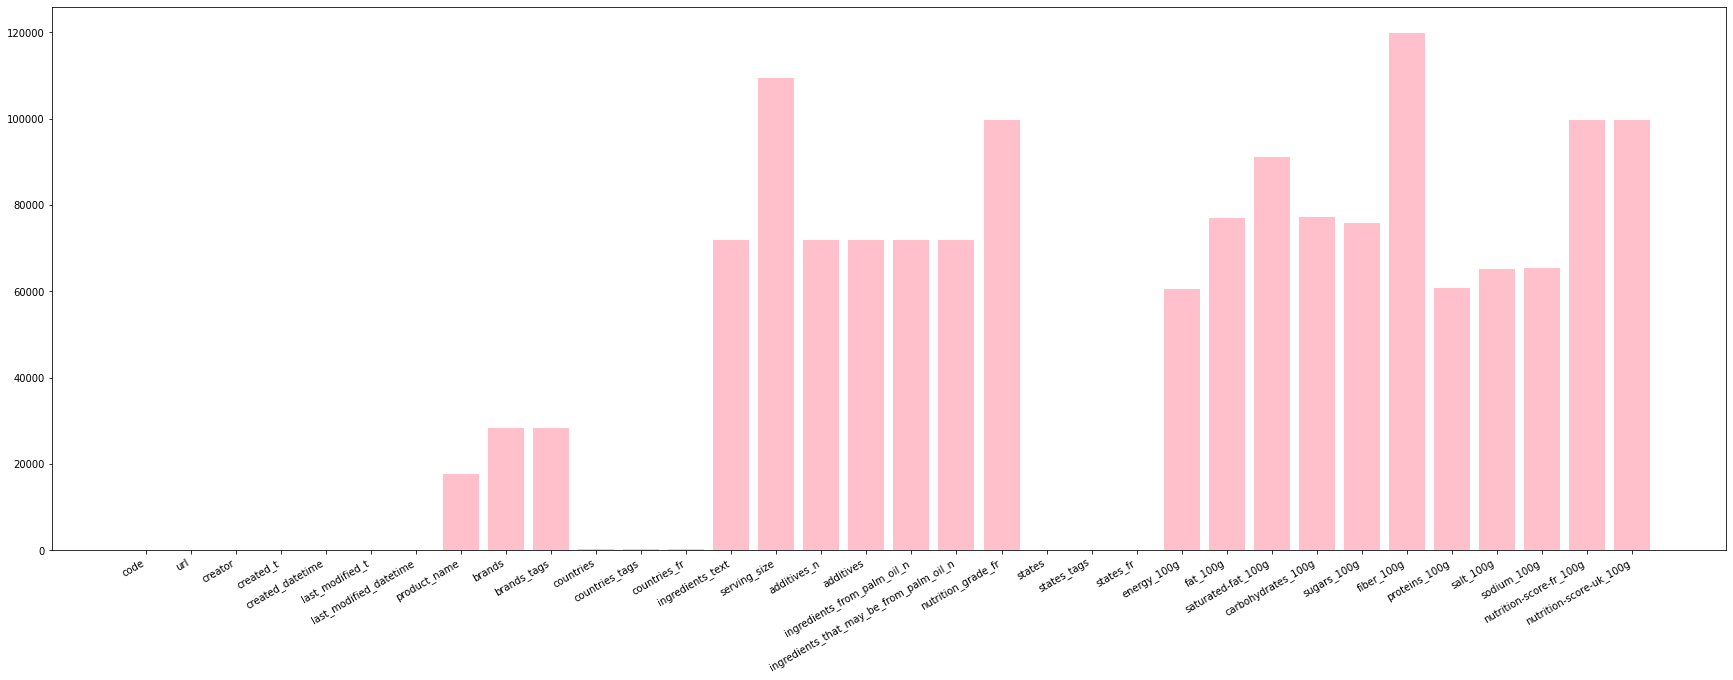

In [ ]:
def graphique_na(dfi):
  nan_columns = []
  nan_values = []
  for column in dfi.columns:
    nan_columns.append(column)
    nan_values.append(dfi[column].isnull().sum())
    
  fig, ax = plt.subplots(figsize=(30,10))
  plt.bar(nan_columns, nan_values, color = 'pink')
  plt.xticks(rotation=30, ha='right')

graphique_na(df2)



Imprimons les catégories qu'il nous reste

Aprés avoir fait face à un problème sur le calcul du mode des colonnes j'ai décidé de supprimer les colonnes : 'product name', 'code', 'url'. Qui sont de tout facon non nécéssaire pour mon idée d'application.


In [ ]:
df3 = df2.drop(['product_name', 'code', 'url'], axis = 1)



In [ ]:
for i in df3.columns:
  print(i)

creator
created_t
created_datetime
last_modified_t
last_modified_datetime
brands
brands_tags
countries
countries_tags
countries_fr
ingredients_text
serving_size
additives_n
additives
ingredients_from_palm_oil_n
ingredients_that_may_be_from_palm_oil_n
nutrition_grade_fr
states
states_tags
states_fr
energy_100g
fat_100g
saturated-fat_100g
carbohydrates_100g
sugars_100g
fiber_100g
proteins_100g
salt_100g
sodium_100g
nutrition-score-fr_100g
nutrition-score-uk_100g


Programme de remplacement et nettoyage des valeurs NA, j'ai décidé de laisser le choix de rempalcement des valeurs numériques par la median ou la moyenne et d'utiliser le mode pour les textes.

In [ ]:
from numpy.ma.extras import median
from pandas.core.algorithms import mode

def valeurvides(dfi, y):
  final_df = dfi.copy()
  if y == 'mean':
    for i in final_df.columns:
      if final_df[i].dtype == 'float64':
        final_df[i] = final_df[i].fillna(value = np.mean(final_df[i]))
      if final_df[i].dtype == 'object':
        true_mode = st.mode(final_df[i].dropna())
        print(true_mode)
        final_df[i] = final_df[i].fillna(value = str(true_mode))
  if y == 'median':
     for i in final_df.columns:
       if final_df[i].dtype == 'float64':
         true_median = median(final_df[i])
         final_df[i] = final_df[i].fillna(value = true_median)
       if final_df[i].dtype == 'object':
         true_mode = st.mode(final_df[i].dropna())
         print(true_mode)
         final_df[i] = final_df[i].fillna(value = str(true_mode))
  return final_df

final_df2 = valeurvides(df3, 'mean')
display(final_df2)

for i in final_df2.columns:
    print(i, sum(final_df2[i].isna()), final_df2[i].dtype)

  


usda-ndb-import
Carrefour
carrefour
US
en:united-states
États-Unis
Carbonated water, natural flavor.
240 ml (8 fl oz)
 [ extra-virgin-olive-oil -> en:extra-virgin-olive-oil  ]  [ virgin-olive-oil -> en:virgin-olive-oil  ]  [ olive-oil -> en:olive-oil  ]  [ oil -> en:oil  ] 
d
en:to-be-completed, en:nutrition-facts-completed, en:ingredients-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-to-be-completed, en:categories-to-be-completed, en:brands-completed, en:packaging-to-be-completed, en:quantity-to-be-completed, en:product-name-completed, en:photos-to-be-uploaded
en:to-be-completed,en:nutrition-facts-completed,en:ingredients-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-completed,en:characteristics-to-be-completed,en:categories-to-be-completed,en:brands-completed,en:packaging-to-be-completed,en:quantity-to-be-completed,en:product-name-completed,en:photos-to-be-uploaded
A compléter,Informations nutritionnelles c

,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,brands,brands_tags,countries,countries_tags,countries_fr,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,openfoodfacts-contributors,1.474104e+09,2016-09-17 11:17:46,1.474104e+09,2016-09-17 11:18:13,Ferme t'y R'nao,ferme-t-y-r-nao,en:FR,en:france,France,...,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
1,usda-ndb-import,1.489070e+09,2017-03-09 15:32:37,1.489070e+09,2017-03-09 15:32:37,Carrefour,carrefour,US,en:united-states,États-Unis,...,28.570000,28.570000,64.290000,14.290000,3.600000,3.57000,0.000000,0.000000,14.000000,14.000000
2,usda-ndb-import,1.489070e+09,2017-03-09 15:32:37,1.489070e+09,2017-03-09 15:32:37,Torn & Glasser,torn-glasser,US,en:united-states,États-Unis,...,17.860000,0.000000,60.710000,17.860000,7.100000,17.86000,0.635000,0.250000,0.000000,0.000000
3,usda-ndb-import,1.489056e+09,2017-03-09 11:35:31,1.489056e+09,2017-03-09 11:35:31,Grizzlies,grizzlies,US,en:united-states,États-Unis,...,57.140000,5.360000,17.860000,3.570000,7.100000,17.86000,1.224280,0.482000,12.000000,12.000000
4,usda-ndb-import,1.489056e+09,2017-03-09 11:34:13,1.489056e+09,2017-03-09 11:34:13,Bob's Red Mill,bob-s-red-mill,US,en:united-states,États-Unis,...,1.430000,5.129932,77.140000,16.003484,5.700000,8.57000,2.028624,0.798815,9.165535,9.058049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,openfoodfacts-contributors,1.490631e+09,2017-03-27 18:14:59,1.491244e+09,2017-04-03 20:34:58,Panzani,panzani,en:RO,en:romania,Roumanie,...,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
320768,usda-ndb-import,1.489059e+09,2017-03-09 12:31:16,1.491244e+09,2017-04-03 20:34:59,Trader Joe's,trader-joe-s,US,en:united-states,États-Unis,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
320769,tomato,1.422099e+09,2015-01-24 12:36:17,1.491244e+09,2017-04-03 20:34:59,乐吧,乐吧,China,en:china,Chine,...,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
320770,openfoodfacts-contributors,1.492340e+09,2017-04-16 12:54:49,1.492340e+09,2017-04-16 12:54:49,Knorr,knorr,en:FR,en:france,France,...,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049


creator 0 object
created_t 0 float64
created_datetime 24 datetime64[ns]
last_modified_t 0 float64
last_modified_datetime 23 datetime64[ns]
brands 0 object
brands_tags 0 object
countries 0 object
countries_tags 0 object
countries_fr 0 object
ingredients_text 0 object
serving_size 0 object
additives_n 0 float64
additives 0 object
ingredients_from_palm_oil_n 0 float64
ingredients_that_may_be_from_palm_oil_n 0 float64
nutrition_grade_fr 0 object
states 0 object
states_tags 0 object
states_fr 0 object
energy_100g 0 float64
fat_100g 0 float64
saturated-fat_100g 0 float64
carbohydrates_100g 0 float64
sugars_100g 0 float64
fiber_100g 0 float64
proteins_100g 0 float64
salt_100g 0 float64
sodium_100g 0 float64
nutrition-score-fr_100g 0 float64
nutrition-score-uk_100g 0 float64


###Gestion des valeurs abherantes

Afin de pouvoir utiliser la distance interquartile pour supprimer les valeurs abherantes, il faut supprimer les colonnes avec un nombre de valeurs différentes inférieur à 30 afin de faire fonctionner la supression par distance interquartile.

In [ ]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    display(df_out)
    return df_out



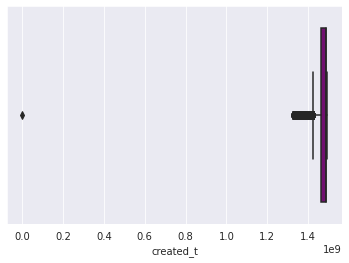

,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,brands,brands_tags,countries,countries_tags,countries_fr,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,openfoodfacts-contributors,1.474104e+09,2016-09-17 11:17:46,1.474104e+09,2016-09-17 11:18:13,Ferme t'y R'nao,ferme-t-y-r-nao,en:FR,en:france,France,...,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
1,usda-ndb-import,1.489070e+09,2017-03-09 15:32:37,1.489070e+09,2017-03-09 15:32:37,Carrefour,carrefour,US,en:united-states,États-Unis,...,28.570000,28.570000,64.290000,14.290000,3.600000,3.57000,0.000000,0.000000,14.000000,14.000000
2,usda-ndb-import,1.489070e+09,2017-03-09 15:32:37,1.489070e+09,2017-03-09 15:32:37,Torn & Glasser,torn-glasser,US,en:united-states,États-Unis,...,17.860000,0.000000,60.710000,17.860000,7.100000,17.86000,0.635000,0.250000,0.000000,0.000000
3,usda-ndb-import,1.489056e+09,2017-03-09 11:35:31,1.489056e+09,2017-03-09 11:35:31,Grizzlies,grizzlies,US,en:united-states,États-Unis,...,57.140000,5.360000,17.860000,3.570000,7.100000,17.86000,1.224280,0.482000,12.000000,12.000000
4,usda-ndb-import,1.489056e+09,2017-03-09 11:34:13,1.489056e+09,2017-03-09 11:34:13,Bob's Red Mill,bob-s-red-mill,US,en:united-states,États-Unis,...,1.430000,5.129932,77.140000,16.003484,5.700000,8.57000,2.028624,0.798815,9.165535,9.058049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320766,date-limite-app,1.463937e+09,2016-05-22 19:02:52,1.491244e+09,2017-04-03 20:34:58,Carrefour,carrefour,United Kingdom,en:united-kingdom,Royaume-Uni,...,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
320767,openfoodfacts-contributors,1.490631e+09,2017-03-27 18:14:59,1.491244e+09,2017-04-03 20:34:58,Panzani,panzani,en:RO,en:romania,Roumanie,...,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
320768,usda-ndb-import,1.489059e+09,2017-03-09 12:31:16,1.491244e+09,2017-04-03 20:34:59,Trader Joe's,trader-joe-s,US,en:united-states,États-Unis,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
320770,openfoodfacts-contributors,1.492340e+09,2017-04-16 12:54:49,1.492340e+09,2017-04-16 12:54:49,Knorr,knorr,en:FR,en:france,France,...,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


created_t


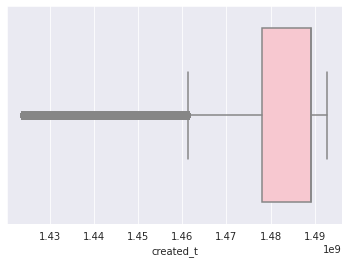

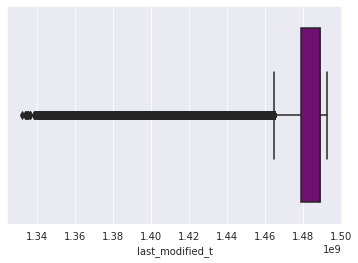

,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,brands,brands_tags,countries,countries_tags,countries_fr,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
1,usda-ndb-import,1.489070e+09,2017-03-09 15:32:37,1.489070e+09,2017-03-09 15:32:37,Carrefour,carrefour,US,en:united-states,États-Unis,...,28.570000,28.570000,64.290000,14.290000,3.600000,3.57000,0.000000,0.000000,14.000000,14.000000
2,usda-ndb-import,1.489070e+09,2017-03-09 15:32:37,1.489070e+09,2017-03-09 15:32:37,Torn & Glasser,torn-glasser,US,en:united-states,États-Unis,...,17.860000,0.000000,60.710000,17.860000,7.100000,17.86000,0.635000,0.250000,0.000000,0.000000
3,usda-ndb-import,1.489056e+09,2017-03-09 11:35:31,1.489056e+09,2017-03-09 11:35:31,Grizzlies,grizzlies,US,en:united-states,États-Unis,...,57.140000,5.360000,17.860000,3.570000,7.100000,17.86000,1.224280,0.482000,12.000000,12.000000
4,usda-ndb-import,1.489056e+09,2017-03-09 11:34:13,1.489056e+09,2017-03-09 11:34:13,Bob's Red Mill,bob-s-red-mill,US,en:united-states,États-Unis,...,1.430000,5.129932,77.140000,16.003484,5.700000,8.57000,2.028624,0.798815,9.165535,9.058049
5,usda-ndb-import,1.489056e+09,2017-03-09 11:34:11,1.489056e+09,2017-03-09 11:34:11,Unfi,unfi,US,en:united-states,États-Unis,...,18.270000,1.920000,63.460000,11.540000,7.700000,13.46000,2.028624,0.798815,9.165535,9.058049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320766,date-limite-app,1.463937e+09,2016-05-22 19:02:52,1.491244e+09,2017-04-03 20:34:58,Carrefour,carrefour,United Kingdom,en:united-kingdom,Royaume-Uni,...,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
320767,openfoodfacts-contributors,1.490631e+09,2017-03-27 18:14:59,1.491244e+09,2017-04-03 20:34:58,Panzani,panzani,en:RO,en:romania,Roumanie,...,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
320768,usda-ndb-import,1.489059e+09,2017-03-09 12:31:16,1.491244e+09,2017-04-03 20:34:59,Trader Joe's,trader-joe-s,US,en:united-states,États-Unis,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
320770,openfoodfacts-contributors,1.492340e+09,2017-04-16 12:54:49,1.492340e+09,2017-04-16 12:54:49,Knorr,knorr,en:FR,en:france,France,...,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


last_modified_t


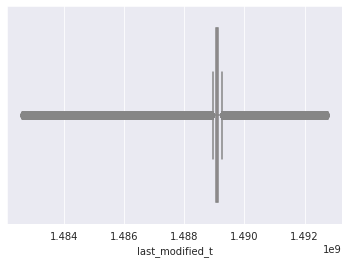

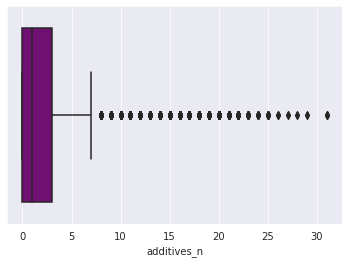

,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,brands,brands_tags,countries,countries_tags,countries_fr,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
1,usda-ndb-import,1.489070e+09,2017-03-09 15:32:37,1.489070e+09,2017-03-09 15:32:37,Carrefour,carrefour,US,en:united-states,États-Unis,...,28.570000,28.570000,64.290000,14.290000,3.600000,3.57000,0.000000,0.000000,14.000000,14.000000
2,usda-ndb-import,1.489070e+09,2017-03-09 15:32:37,1.489070e+09,2017-03-09 15:32:37,Torn & Glasser,torn-glasser,US,en:united-states,États-Unis,...,17.860000,0.000000,60.710000,17.860000,7.100000,17.86000,0.635000,0.250000,0.000000,0.000000
3,usda-ndb-import,1.489056e+09,2017-03-09 11:35:31,1.489056e+09,2017-03-09 11:35:31,Grizzlies,grizzlies,US,en:united-states,États-Unis,...,57.140000,5.360000,17.860000,3.570000,7.100000,17.86000,1.224280,0.482000,12.000000,12.000000
4,usda-ndb-import,1.489056e+09,2017-03-09 11:34:13,1.489056e+09,2017-03-09 11:34:13,Bob's Red Mill,bob-s-red-mill,US,en:united-states,États-Unis,...,1.430000,5.129932,77.140000,16.003484,5.700000,8.57000,2.028624,0.798815,9.165535,9.058049
5,usda-ndb-import,1.489056e+09,2017-03-09 11:34:11,1.489056e+09,2017-03-09 11:34:11,Unfi,unfi,US,en:united-states,États-Unis,...,18.270000,1.920000,63.460000,11.540000,7.700000,13.46000,2.028624,0.798815,9.165535,9.058049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320766,date-limite-app,1.463937e+09,2016-05-22 19:02:52,1.491244e+09,2017-04-03 20:34:58,Carrefour,carrefour,United Kingdom,en:united-kingdom,Royaume-Uni,...,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
320767,openfoodfacts-contributors,1.490631e+09,2017-03-27 18:14:59,1.491244e+09,2017-04-03 20:34:58,Panzani,panzani,en:RO,en:romania,Roumanie,...,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
320768,usda-ndb-import,1.489059e+09,2017-03-09 12:31:16,1.491244e+09,2017-04-03 20:34:59,Trader Joe's,trader-joe-s,US,en:united-states,États-Unis,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
320770,openfoodfacts-contributors,1.492340e+09,2017-04-16 12:54:49,1.492340e+09,2017-04-16 12:54:49,Knorr,knorr,en:FR,en:france,France,...,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


additives_n


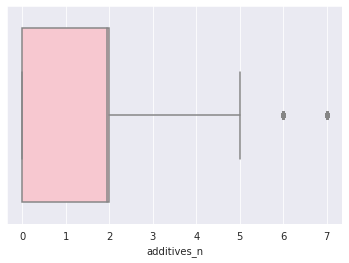

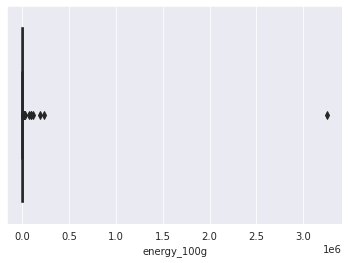

,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,brands,brands_tags,countries,countries_tags,countries_fr,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
1,usda-ndb-import,1.489070e+09,2017-03-09 15:32:37,1.489070e+09,2017-03-09 15:32:37,Carrefour,carrefour,US,en:united-states,États-Unis,...,28.570000,28.570000,64.290000,14.290000,3.600000,3.57000,0.000000,0.000000,14.000000,14.000000
2,usda-ndb-import,1.489070e+09,2017-03-09 15:32:37,1.489070e+09,2017-03-09 15:32:37,Torn & Glasser,torn-glasser,US,en:united-states,États-Unis,...,17.860000,0.000000,60.710000,17.860000,7.100000,17.86000,0.635000,0.250000,0.000000,0.000000
3,usda-ndb-import,1.489056e+09,2017-03-09 11:35:31,1.489056e+09,2017-03-09 11:35:31,Grizzlies,grizzlies,US,en:united-states,États-Unis,...,57.140000,5.360000,17.860000,3.570000,7.100000,17.86000,1.224280,0.482000,12.000000,12.000000
4,usda-ndb-import,1.489056e+09,2017-03-09 11:34:13,1.489056e+09,2017-03-09 11:34:13,Bob's Red Mill,bob-s-red-mill,US,en:united-states,États-Unis,...,1.430000,5.129932,77.140000,16.003484,5.700000,8.57000,2.028624,0.798815,9.165535,9.058049
5,usda-ndb-import,1.489056e+09,2017-03-09 11:34:11,1.489056e+09,2017-03-09 11:34:11,Unfi,unfi,US,en:united-states,États-Unis,...,18.270000,1.920000,63.460000,11.540000,7.700000,13.46000,2.028624,0.798815,9.165535,9.058049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320766,date-limite-app,1.463937e+09,2016-05-22 19:02:52,1.491244e+09,2017-04-03 20:34:58,Carrefour,carrefour,United Kingdom,en:united-kingdom,Royaume-Uni,...,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
320767,openfoodfacts-contributors,1.490631e+09,2017-03-27 18:14:59,1.491244e+09,2017-04-03 20:34:58,Panzani,panzani,en:RO,en:romania,Roumanie,...,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
320768,usda-ndb-import,1.489059e+09,2017-03-09 12:31:16,1.491244e+09,2017-04-03 20:34:59,Trader Joe's,trader-joe-s,US,en:united-states,États-Unis,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
320770,openfoodfacts-contributors,1.492340e+09,2017-04-16 12:54:49,1.492340e+09,2017-04-16 12:54:49,Knorr,knorr,en:FR,en:france,France,...,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


energy_100g


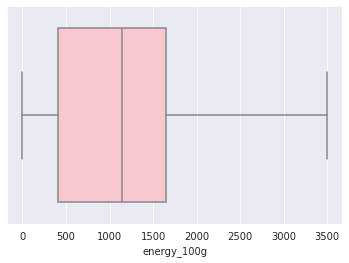

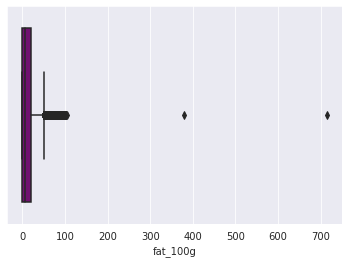

,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,brands,brands_tags,countries,countries_tags,countries_fr,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
1,usda-ndb-import,1.489070e+09,2017-03-09 15:32:37,1.489070e+09,2017-03-09 15:32:37,Carrefour,carrefour,US,en:united-states,États-Unis,...,28.570000,28.570000,64.290000,14.290000,3.600000,3.57000,0.000000,0.000000,14.000000,14.000000
2,usda-ndb-import,1.489070e+09,2017-03-09 15:32:37,1.489070e+09,2017-03-09 15:32:37,Torn & Glasser,torn-glasser,US,en:united-states,États-Unis,...,17.860000,0.000000,60.710000,17.860000,7.100000,17.86000,0.635000,0.250000,0.000000,0.000000
4,usda-ndb-import,1.489056e+09,2017-03-09 11:34:13,1.489056e+09,2017-03-09 11:34:13,Bob's Red Mill,bob-s-red-mill,US,en:united-states,États-Unis,...,1.430000,5.129932,77.140000,16.003484,5.700000,8.57000,2.028624,0.798815,9.165535,9.058049
5,usda-ndb-import,1.489056e+09,2017-03-09 11:34:11,1.489056e+09,2017-03-09 11:34:11,Unfi,unfi,US,en:united-states,États-Unis,...,18.270000,1.920000,63.460000,11.540000,7.700000,13.46000,2.028624,0.798815,9.165535,9.058049
6,usda-ndb-import,1.489056e+09,2017-03-09 11:35:30,1.489056e+09,2017-03-09 11:35:30,Lundberg,lundberg,US,en:united-states,États-Unis,...,12.730379,5.129932,80.000000,16.003484,2.862111,8.89000,2.028624,0.798815,9.165535,9.058049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320766,date-limite-app,1.463937e+09,2016-05-22 19:02:52,1.491244e+09,2017-04-03 20:34:58,Carrefour,carrefour,United Kingdom,en:united-kingdom,Royaume-Uni,...,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
320767,openfoodfacts-contributors,1.490631e+09,2017-03-27 18:14:59,1.491244e+09,2017-04-03 20:34:58,Panzani,panzani,en:RO,en:romania,Roumanie,...,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
320768,usda-ndb-import,1.489059e+09,2017-03-09 12:31:16,1.491244e+09,2017-04-03 20:34:59,Trader Joe's,trader-joe-s,US,en:united-states,États-Unis,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
320770,openfoodfacts-contributors,1.492340e+09,2017-04-16 12:54:49,1.492340e+09,2017-04-16 12:54:49,Knorr,knorr,en:FR,en:france,France,...,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


fat_100g


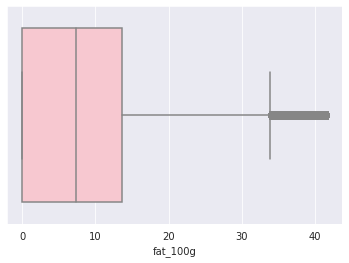

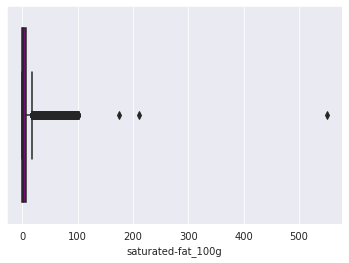

,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,brands,brands_tags,countries,countries_tags,countries_fr,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
2,usda-ndb-import,1.489070e+09,2017-03-09 15:32:37,1.489070e+09,2017-03-09 15:32:37,Torn & Glasser,torn-glasser,US,en:united-states,États-Unis,...,17.860000,0.000000,60.710000,17.860000,7.100000,17.86000,0.635000,0.250000,0.000000,0.000000
4,usda-ndb-import,1.489056e+09,2017-03-09 11:34:13,1.489056e+09,2017-03-09 11:34:13,Bob's Red Mill,bob-s-red-mill,US,en:united-states,États-Unis,...,1.430000,5.129932,77.140000,16.003484,5.700000,8.57000,2.028624,0.798815,9.165535,9.058049
5,usda-ndb-import,1.489056e+09,2017-03-09 11:34:11,1.489056e+09,2017-03-09 11:34:11,Unfi,unfi,US,en:united-states,États-Unis,...,18.270000,1.920000,63.460000,11.540000,7.700000,13.46000,2.028624,0.798815,9.165535,9.058049
6,usda-ndb-import,1.489056e+09,2017-03-09 11:35:30,1.489056e+09,2017-03-09 11:35:30,Lundberg,lundberg,US,en:united-states,États-Unis,...,12.730379,5.129932,80.000000,16.003484,2.862111,8.89000,2.028624,0.798815,9.165535,9.058049
7,usda-ndb-import,1.489056e+09,2017-03-09 11:35:11,1.489056e+09,2017-03-09 11:35:12,Daddy's Muesli,daddy-s-muesli,US,en:united-states,États-Unis,...,18.750000,4.690000,57.810000,15.620000,9.400000,14.06000,0.139700,0.055000,7.000000,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320766,date-limite-app,1.463937e+09,2016-05-22 19:02:52,1.491244e+09,2017-04-03 20:34:58,Carrefour,carrefour,United Kingdom,en:united-kingdom,Royaume-Uni,...,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
320767,openfoodfacts-contributors,1.490631e+09,2017-03-27 18:14:59,1.491244e+09,2017-04-03 20:34:58,Panzani,panzani,en:RO,en:romania,Roumanie,...,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
320768,usda-ndb-import,1.489059e+09,2017-03-09 12:31:16,1.491244e+09,2017-04-03 20:34:59,Trader Joe's,trader-joe-s,US,en:united-states,États-Unis,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
320770,openfoodfacts-contributors,1.492340e+09,2017-04-16 12:54:49,1.492340e+09,2017-04-16 12:54:49,Knorr,knorr,en:FR,en:france,France,...,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


saturated-fat_100g


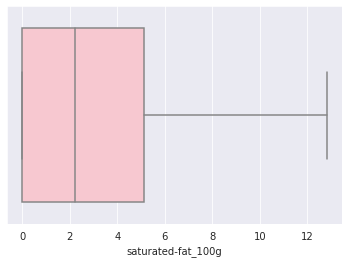

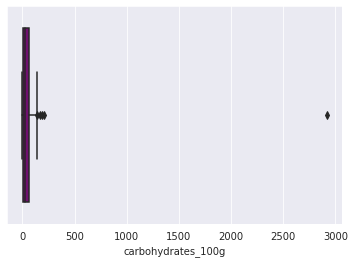

,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,brands,brands_tags,countries,countries_tags,countries_fr,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
2,usda-ndb-import,1.489070e+09,2017-03-09 15:32:37,1.489070e+09,2017-03-09 15:32:37,Torn & Glasser,torn-glasser,US,en:united-states,États-Unis,...,17.860000,0.000000,60.710000,17.860000,7.100000,17.86000,0.635000,0.250000,0.000000,0.000000
4,usda-ndb-import,1.489056e+09,2017-03-09 11:34:13,1.489056e+09,2017-03-09 11:34:13,Bob's Red Mill,bob-s-red-mill,US,en:united-states,États-Unis,...,1.430000,5.129932,77.140000,16.003484,5.700000,8.57000,2.028624,0.798815,9.165535,9.058049
5,usda-ndb-import,1.489056e+09,2017-03-09 11:34:11,1.489056e+09,2017-03-09 11:34:11,Unfi,unfi,US,en:united-states,États-Unis,...,18.270000,1.920000,63.460000,11.540000,7.700000,13.46000,2.028624,0.798815,9.165535,9.058049
6,usda-ndb-import,1.489056e+09,2017-03-09 11:35:30,1.489056e+09,2017-03-09 11:35:30,Lundberg,lundberg,US,en:united-states,États-Unis,...,12.730379,5.129932,80.000000,16.003484,2.862111,8.89000,2.028624,0.798815,9.165535,9.058049
7,usda-ndb-import,1.489056e+09,2017-03-09 11:35:11,1.489056e+09,2017-03-09 11:35:12,Daddy's Muesli,daddy-s-muesli,US,en:united-states,États-Unis,...,18.750000,4.690000,57.810000,15.620000,9.400000,14.06000,0.139700,0.055000,7.000000,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320766,date-limite-app,1.463937e+09,2016-05-22 19:02:52,1.491244e+09,2017-04-03 20:34:58,Carrefour,carrefour,United Kingdom,en:united-kingdom,Royaume-Uni,...,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
320767,openfoodfacts-contributors,1.490631e+09,2017-03-27 18:14:59,1.491244e+09,2017-04-03 20:34:58,Panzani,panzani,en:RO,en:romania,Roumanie,...,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
320768,usda-ndb-import,1.489059e+09,2017-03-09 12:31:16,1.491244e+09,2017-04-03 20:34:59,Trader Joe's,trader-joe-s,US,en:united-states,États-Unis,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
320770,openfoodfacts-contributors,1.492340e+09,2017-04-16 12:54:49,1.492340e+09,2017-04-16 12:54:49,Knorr,knorr,en:FR,en:france,France,...,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


carbohydrates_100g


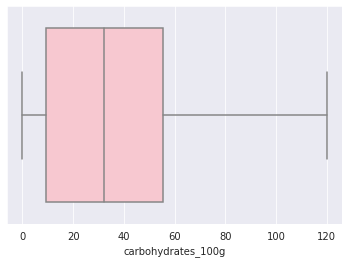

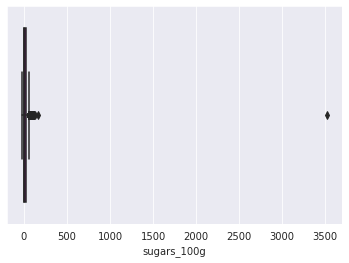

,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,brands,brands_tags,countries,countries_tags,countries_fr,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
2,usda-ndb-import,1.489070e+09,2017-03-09 15:32:37,1.489070e+09,2017-03-09 15:32:37,Torn & Glasser,torn-glasser,US,en:united-states,États-Unis,...,17.860000,0.000000,60.710000,17.860000,7.100000,17.86000,0.635000,0.250000,0.000000,0.000000
4,usda-ndb-import,1.489056e+09,2017-03-09 11:34:13,1.489056e+09,2017-03-09 11:34:13,Bob's Red Mill,bob-s-red-mill,US,en:united-states,États-Unis,...,1.430000,5.129932,77.140000,16.003484,5.700000,8.57000,2.028624,0.798815,9.165535,9.058049
5,usda-ndb-import,1.489056e+09,2017-03-09 11:34:11,1.489056e+09,2017-03-09 11:34:11,Unfi,unfi,US,en:united-states,États-Unis,...,18.270000,1.920000,63.460000,11.540000,7.700000,13.46000,2.028624,0.798815,9.165535,9.058049
6,usda-ndb-import,1.489056e+09,2017-03-09 11:35:30,1.489056e+09,2017-03-09 11:35:30,Lundberg,lundberg,US,en:united-states,États-Unis,...,12.730379,5.129932,80.000000,16.003484,2.862111,8.89000,2.028624,0.798815,9.165535,9.058049
7,usda-ndb-import,1.489056e+09,2017-03-09 11:35:11,1.489056e+09,2017-03-09 11:35:12,Daddy's Muesli,daddy-s-muesli,US,en:united-states,États-Unis,...,18.750000,4.690000,57.810000,15.620000,9.400000,14.06000,0.139700,0.055000,7.000000,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320766,date-limite-app,1.463937e+09,2016-05-22 19:02:52,1.491244e+09,2017-04-03 20:34:58,Carrefour,carrefour,United Kingdom,en:united-kingdom,Royaume-Uni,...,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
320767,openfoodfacts-contributors,1.490631e+09,2017-03-27 18:14:59,1.491244e+09,2017-04-03 20:34:58,Panzani,panzani,en:RO,en:romania,Roumanie,...,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
320768,usda-ndb-import,1.489059e+09,2017-03-09 12:31:16,1.491244e+09,2017-04-03 20:34:59,Trader Joe's,trader-joe-s,US,en:united-states,États-Unis,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
320770,openfoodfacts-contributors,1.492340e+09,2017-04-16 12:54:49,1.492340e+09,2017-04-16 12:54:49,Knorr,knorr,en:FR,en:france,France,...,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


sugars_100g


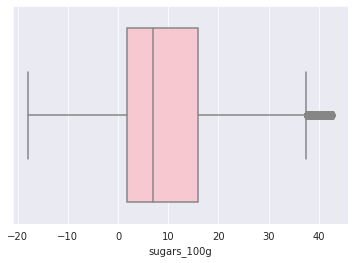

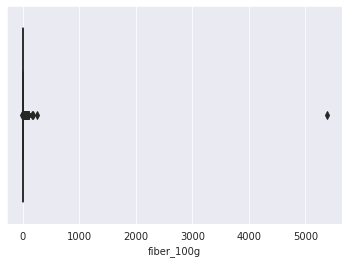

,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,brands,brands_tags,countries,countries_tags,countries_fr,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
2,usda-ndb-import,1.489070e+09,2017-03-09 15:32:37,1.489070e+09,2017-03-09 15:32:37,Torn & Glasser,torn-glasser,US,en:united-states,États-Unis,...,17.860000,0.000000,60.710000,17.860000,7.100000,17.86000,0.635000,0.250000,0.000000,0.000000
4,usda-ndb-import,1.489056e+09,2017-03-09 11:34:13,1.489056e+09,2017-03-09 11:34:13,Bob's Red Mill,bob-s-red-mill,US,en:united-states,États-Unis,...,1.430000,5.129932,77.140000,16.003484,5.700000,8.57000,2.028624,0.798815,9.165535,9.058049
6,usda-ndb-import,1.489056e+09,2017-03-09 11:35:30,1.489056e+09,2017-03-09 11:35:30,Lundberg,lundberg,US,en:united-states,États-Unis,...,12.730379,5.129932,80.000000,16.003484,2.862111,8.89000,2.028624,0.798815,9.165535,9.058049
11,usda-ndb-import,1.489056e+09,2017-03-09 11:34:28,1.489056e+09,2017-03-09 11:34:28,Gardentime,gardentime,US,en:united-states,États-Unis,...,1.750000,5.129932,73.680000,16.003484,1.800000,14.04000,2.028624,0.798815,9.165535,9.058049
12,usda-ndb-import,1.489056e+09,2017-03-09 11:34:10,1.489056e+09,2017-03-09 11:34:11,Sunridge,sunridge,US,en:united-states,États-Unis,...,36.670000,5.000000,36.670000,3.330000,6.700000,16.67000,1.607820,0.633000,12.000000,12.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320766,date-limite-app,1.463937e+09,2016-05-22 19:02:52,1.491244e+09,2017-04-03 20:34:58,Carrefour,carrefour,United Kingdom,en:united-kingdom,Royaume-Uni,...,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
320767,openfoodfacts-contributors,1.490631e+09,2017-03-27 18:14:59,1.491244e+09,2017-04-03 20:34:58,Panzani,panzani,en:RO,en:romania,Roumanie,...,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
320768,usda-ndb-import,1.489059e+09,2017-03-09 12:31:16,1.491244e+09,2017-04-03 20:34:59,Trader Joe's,trader-joe-s,US,en:united-states,États-Unis,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
320770,openfoodfacts-contributors,1.492340e+09,2017-04-16 12:54:49,1.492340e+09,2017-04-16 12:54:49,Knorr,knorr,en:FR,en:france,France,...,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


fiber_100g


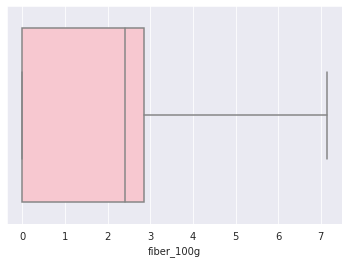

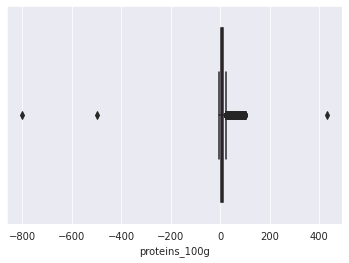

,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,brands,brands_tags,countries,countries_tags,countries_fr,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
2,usda-ndb-import,1.489070e+09,2017-03-09 15:32:37,1.489070e+09,2017-03-09 15:32:37,Torn & Glasser,torn-glasser,US,en:united-states,États-Unis,...,17.860000,0.000000,60.710000,17.860000,7.100000,17.86000,0.635000,0.250000,0.000000,0.000000
4,usda-ndb-import,1.489056e+09,2017-03-09 11:34:13,1.489056e+09,2017-03-09 11:34:13,Bob's Red Mill,bob-s-red-mill,US,en:united-states,États-Unis,...,1.430000,5.129932,77.140000,16.003484,5.700000,8.57000,2.028624,0.798815,9.165535,9.058049
6,usda-ndb-import,1.489056e+09,2017-03-09 11:35:30,1.489056e+09,2017-03-09 11:35:30,Lundberg,lundberg,US,en:united-states,États-Unis,...,12.730379,5.129932,80.000000,16.003484,2.862111,8.89000,2.028624,0.798815,9.165535,9.058049
11,usda-ndb-import,1.489056e+09,2017-03-09 11:34:28,1.489056e+09,2017-03-09 11:34:28,Gardentime,gardentime,US,en:united-states,États-Unis,...,1.750000,5.129932,73.680000,16.003484,1.800000,14.04000,2.028624,0.798815,9.165535,9.058049
12,usda-ndb-import,1.489056e+09,2017-03-09 11:34:10,1.489056e+09,2017-03-09 11:34:11,Sunridge,sunridge,US,en:united-states,États-Unis,...,36.670000,5.000000,36.670000,3.330000,6.700000,16.67000,1.607820,0.633000,12.000000,12.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320766,date-limite-app,1.463937e+09,2016-05-22 19:02:52,1.491244e+09,2017-04-03 20:34:58,Carrefour,carrefour,United Kingdom,en:united-kingdom,Royaume-Uni,...,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
320767,openfoodfacts-contributors,1.490631e+09,2017-03-27 18:14:59,1.491244e+09,2017-04-03 20:34:58,Panzani,panzani,en:RO,en:romania,Roumanie,...,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
320768,usda-ndb-import,1.489059e+09,2017-03-09 12:31:16,1.491244e+09,2017-04-03 20:34:59,Trader Joe's,trader-joe-s,US,en:united-states,États-Unis,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
320770,openfoodfacts-contributors,1.492340e+09,2017-04-16 12:54:49,1.492340e+09,2017-04-16 12:54:49,Knorr,knorr,en:FR,en:france,France,...,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


proteins_100g


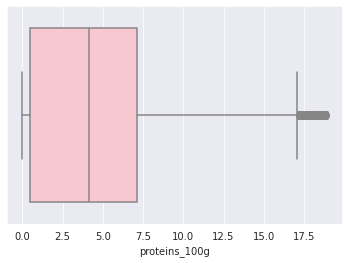

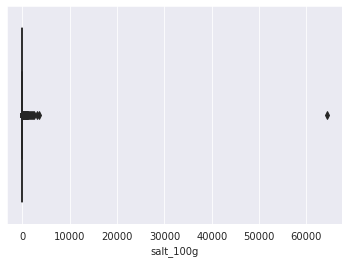

,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,brands,brands_tags,countries,countries_tags,countries_fr,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
2,usda-ndb-import,1.489070e+09,2017-03-09 15:32:37,1.489070e+09,2017-03-09 15:32:37,Torn & Glasser,torn-glasser,US,en:united-states,États-Unis,...,17.860000,0.000000,60.710000,17.860000,7.100000,17.86000,0.635000,0.250000,0.000000,0.000000
4,usda-ndb-import,1.489056e+09,2017-03-09 11:34:13,1.489056e+09,2017-03-09 11:34:13,Bob's Red Mill,bob-s-red-mill,US,en:united-states,États-Unis,...,1.430000,5.129932,77.140000,16.003484,5.700000,8.57000,2.028624,0.798815,9.165535,9.058049
6,usda-ndb-import,1.489056e+09,2017-03-09 11:35:30,1.489056e+09,2017-03-09 11:35:30,Lundberg,lundberg,US,en:united-states,États-Unis,...,12.730379,5.129932,80.000000,16.003484,2.862111,8.89000,2.028624,0.798815,9.165535,9.058049
11,usda-ndb-import,1.489056e+09,2017-03-09 11:34:28,1.489056e+09,2017-03-09 11:34:28,Gardentime,gardentime,US,en:united-states,États-Unis,...,1.750000,5.129932,73.680000,16.003484,1.800000,14.04000,2.028624,0.798815,9.165535,9.058049
12,usda-ndb-import,1.489056e+09,2017-03-09 11:34:10,1.489056e+09,2017-03-09 11:34:11,Sunridge,sunridge,US,en:united-states,États-Unis,...,36.670000,5.000000,36.670000,3.330000,6.700000,16.67000,1.607820,0.633000,12.000000,12.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320766,date-limite-app,1.463937e+09,2016-05-22 19:02:52,1.491244e+09,2017-04-03 20:34:58,Carrefour,carrefour,United Kingdom,en:united-kingdom,Royaume-Uni,...,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
320767,openfoodfacts-contributors,1.490631e+09,2017-03-27 18:14:59,1.491244e+09,2017-04-03 20:34:58,Panzani,panzani,en:RO,en:romania,Roumanie,...,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
320768,usda-ndb-import,1.489059e+09,2017-03-09 12:31:16,1.491244e+09,2017-04-03 20:34:59,Trader Joe's,trader-joe-s,US,en:united-states,États-Unis,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
320770,openfoodfacts-contributors,1.492340e+09,2017-04-16 12:54:49,1.492340e+09,2017-04-16 12:54:49,Knorr,knorr,en:FR,en:france,France,...,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


salt_100g


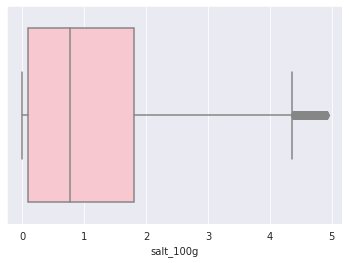

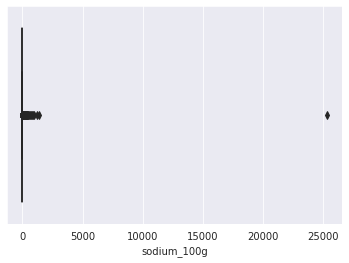

,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,brands,brands_tags,countries,countries_tags,countries_fr,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
2,usda-ndb-import,1.489070e+09,2017-03-09 15:32:37,1.489070e+09,2017-03-09 15:32:37,Torn & Glasser,torn-glasser,US,en:united-states,États-Unis,...,17.860000,0.000000,60.710000,17.860000,7.100000,17.86000,0.635000,0.250000,0.000000,0.000000
4,usda-ndb-import,1.489056e+09,2017-03-09 11:34:13,1.489056e+09,2017-03-09 11:34:13,Bob's Red Mill,bob-s-red-mill,US,en:united-states,États-Unis,...,1.430000,5.129932,77.140000,16.003484,5.700000,8.57000,2.028624,0.798815,9.165535,9.058049
6,usda-ndb-import,1.489056e+09,2017-03-09 11:35:30,1.489056e+09,2017-03-09 11:35:30,Lundberg,lundberg,US,en:united-states,États-Unis,...,12.730379,5.129932,80.000000,16.003484,2.862111,8.89000,2.028624,0.798815,9.165535,9.058049
11,usda-ndb-import,1.489056e+09,2017-03-09 11:34:28,1.489056e+09,2017-03-09 11:34:28,Gardentime,gardentime,US,en:united-states,États-Unis,...,1.750000,5.129932,73.680000,16.003484,1.800000,14.04000,2.028624,0.798815,9.165535,9.058049
12,usda-ndb-import,1.489056e+09,2017-03-09 11:34:10,1.489056e+09,2017-03-09 11:34:11,Sunridge,sunridge,US,en:united-states,États-Unis,...,36.670000,5.000000,36.670000,3.330000,6.700000,16.67000,1.607820,0.633000,12.000000,12.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320766,date-limite-app,1.463937e+09,2016-05-22 19:02:52,1.491244e+09,2017-04-03 20:34:58,Carrefour,carrefour,United Kingdom,en:united-kingdom,Royaume-Uni,...,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
320767,openfoodfacts-contributors,1.490631e+09,2017-03-27 18:14:59,1.491244e+09,2017-04-03 20:34:58,Panzani,panzani,en:RO,en:romania,Roumanie,...,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
320768,usda-ndb-import,1.489059e+09,2017-03-09 12:31:16,1.491244e+09,2017-04-03 20:34:59,Trader Joe's,trader-joe-s,US,en:united-states,États-Unis,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
320770,openfoodfacts-contributors,1.492340e+09,2017-04-16 12:54:49,1.492340e+09,2017-04-16 12:54:49,Knorr,knorr,en:FR,en:france,France,...,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


sodium_100g


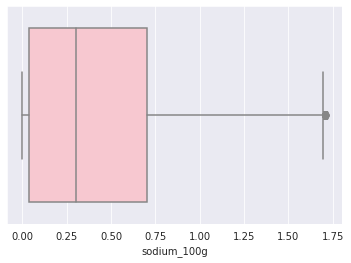

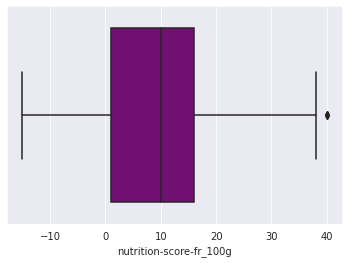

,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,brands,brands_tags,countries,countries_tags,countries_fr,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
2,usda-ndb-import,1.489070e+09,2017-03-09 15:32:37,1.489070e+09,2017-03-09 15:32:37,Torn & Glasser,torn-glasser,US,en:united-states,États-Unis,...,17.860000,0.000000,60.710000,17.860000,7.100000,17.86000,0.635000,0.250000,0.000000,0.000000
4,usda-ndb-import,1.489056e+09,2017-03-09 11:34:13,1.489056e+09,2017-03-09 11:34:13,Bob's Red Mill,bob-s-red-mill,US,en:united-states,États-Unis,...,1.430000,5.129932,77.140000,16.003484,5.700000,8.57000,2.028624,0.798815,9.165535,9.058049
6,usda-ndb-import,1.489056e+09,2017-03-09 11:35:30,1.489056e+09,2017-03-09 11:35:30,Lundberg,lundberg,US,en:united-states,États-Unis,...,12.730379,5.129932,80.000000,16.003484,2.862111,8.89000,2.028624,0.798815,9.165535,9.058049
11,usda-ndb-import,1.489056e+09,2017-03-09 11:34:28,1.489056e+09,2017-03-09 11:34:28,Gardentime,gardentime,US,en:united-states,États-Unis,...,1.750000,5.129932,73.680000,16.003484,1.800000,14.04000,2.028624,0.798815,9.165535,9.058049
12,usda-ndb-import,1.489056e+09,2017-03-09 11:34:10,1.489056e+09,2017-03-09 11:34:11,Sunridge,sunridge,US,en:united-states,États-Unis,...,36.670000,5.000000,36.670000,3.330000,6.700000,16.67000,1.607820,0.633000,12.000000,12.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320766,date-limite-app,1.463937e+09,2016-05-22 19:02:52,1.491244e+09,2017-04-03 20:34:58,Carrefour,carrefour,United Kingdom,en:united-kingdom,Royaume-Uni,...,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
320767,openfoodfacts-contributors,1.490631e+09,2017-03-27 18:14:59,1.491244e+09,2017-04-03 20:34:58,Panzani,panzani,en:RO,en:romania,Roumanie,...,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
320768,usda-ndb-import,1.489059e+09,2017-03-09 12:31:16,1.491244e+09,2017-04-03 20:34:59,Trader Joe's,trader-joe-s,US,en:united-states,États-Unis,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
320770,openfoodfacts-contributors,1.492340e+09,2017-04-16 12:54:49,1.492340e+09,2017-04-16 12:54:49,Knorr,knorr,en:FR,en:france,France,...,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


nutrition-score-fr_100g


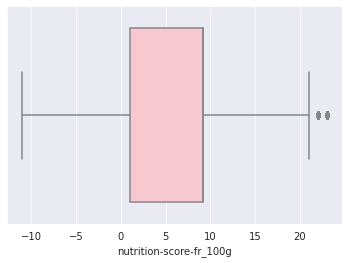

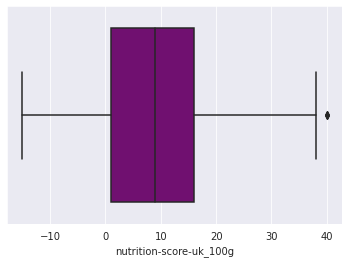

,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,brands,brands_tags,countries,countries_tags,countries_fr,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
2,usda-ndb-import,1.489070e+09,2017-03-09 15:32:37,1.489070e+09,2017-03-09 15:32:37,Torn & Glasser,torn-glasser,US,en:united-states,États-Unis,...,17.860000,0.000000,60.710000,17.860000,7.100000,17.86000,0.635000,0.250000,0.000000,0.000000
4,usda-ndb-import,1.489056e+09,2017-03-09 11:34:13,1.489056e+09,2017-03-09 11:34:13,Bob's Red Mill,bob-s-red-mill,US,en:united-states,États-Unis,...,1.430000,5.129932,77.140000,16.003484,5.700000,8.57000,2.028624,0.798815,9.165535,9.058049
6,usda-ndb-import,1.489056e+09,2017-03-09 11:35:30,1.489056e+09,2017-03-09 11:35:30,Lundberg,lundberg,US,en:united-states,États-Unis,...,12.730379,5.129932,80.000000,16.003484,2.862111,8.89000,2.028624,0.798815,9.165535,9.058049
11,usda-ndb-import,1.489056e+09,2017-03-09 11:34:28,1.489056e+09,2017-03-09 11:34:28,Gardentime,gardentime,US,en:united-states,États-Unis,...,1.750000,5.129932,73.680000,16.003484,1.800000,14.04000,2.028624,0.798815,9.165535,9.058049
12,usda-ndb-import,1.489056e+09,2017-03-09 11:34:10,1.489056e+09,2017-03-09 11:34:11,Sunridge,sunridge,US,en:united-states,États-Unis,...,36.670000,5.000000,36.670000,3.330000,6.700000,16.67000,1.607820,0.633000,12.000000,12.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320766,date-limite-app,1.463937e+09,2016-05-22 19:02:52,1.491244e+09,2017-04-03 20:34:58,Carrefour,carrefour,United Kingdom,en:united-kingdom,Royaume-Uni,...,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
320767,openfoodfacts-contributors,1.490631e+09,2017-03-27 18:14:59,1.491244e+09,2017-04-03 20:34:58,Panzani,panzani,en:RO,en:romania,Roumanie,...,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
320768,usda-ndb-import,1.489059e+09,2017-03-09 12:31:16,1.491244e+09,2017-04-03 20:34:59,Trader Joe's,trader-joe-s,US,en:united-states,États-Unis,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
320770,openfoodfacts-contributors,1.492340e+09,2017-04-16 12:54:49,1.492340e+09,2017-04-16 12:54:49,Knorr,knorr,en:FR,en:france,France,...,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


nutrition-score-uk_100g


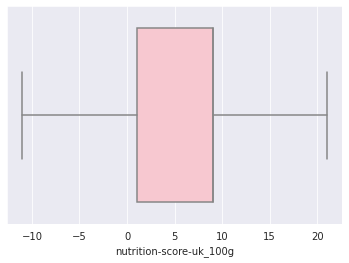

In [ ]:
for i in final_df2.columns:
  if final_df2[i].dtype == 'int' or final_df2[i].dtype == 'float':
    if len(final_df2[i].unique()) > 30:
      sns.set_style('darkgrid')
      sns.boxplot(x = i, data = df3, color = 'purple')
      plt.show()
      final_df2 = remove_outlier(final_df2, i)
      sns.boxplot(i, data = final_df2, color = 'pink')
      print(i)
      plt.show()

In [ ]:
final_df2.to_excel(r'/content/gdrive/My Drive/openclassrooms/final_df2.xlsx', index=False, encoding='utf-8-sig' )
